# Telecom prepaid plan analytics.

##  Project description:
A telecom operator Megaline is looking at using insights from analytics to make adjustments in advertising budget. The company offers its clients two prepaid plans, Smart and Ultra. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

It is required to carry out a preliminary analysis of the plans based on a relatively small client selection. The data on 500 Megaline clients is available: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. The objective is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

Prepaid plans:

Smart

Monthly charge: 550 rubles
500 monthly minutes, 50 texts and 15 GB of data
After exceeding the package limits:
1 minute: 3 rubles ("Megaline" always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute)
1 text message: 3 rubles
1 GB of data: 200 rubles.

Ultra

Monthly charge: $1950 rubles
3000 monthly minutes, 1000 text messages, and 30 GB of data
After exceeding the package limits:
1 minute: 1 rubles
1 text messgae: 1 rubles
1 GB of web traffic: 150 rubles.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-description:" data-toc-modified-id="Project-description:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project description:</a></span></li><li><span><a href="#Open-the-data-file-and-study-the-general-information" data-toc-modified-id="Open-the-data-file-and-study-the-general-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Open the data file and study the general information</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data analysis</a></span></li><li><span><a href="#Hypotheses-testing." data-toc-modified-id="Hypotheses-testing.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypotheses testing.</a></span></li><li><span><a href="#Conclusion:" data-toc-modified-id="Conclusion:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion:</a></span></li></ul></div>

## Open the data file and study the general information

First we need to import the libraries (pandas, numpy, matplotlib, seaborn)and warnings.

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

Now we need to upload and read the data. 

In [2]:
# <reading data and saving to df>') 
calls=pd.read_csv('Telecom project/calls.csv')
internet=pd.read_csv('Telecom project/internet.csv')
messages=pd.read_csv('Telecom project/messages.csv')
tariffs=pd.read_csv('Telecom project/tariffs.csv')
users=pd.read_csv('Telecom project/users.csv')
pd.set_option('display.max_columns', None)#setting for displaying all dataframe columns
calls.head()# reading first 5 lines of the dataset

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Let's use .info() method to print information about the dataframe and apply duplicate() method to check the data for duplicates.

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.duplicated().sum()

0

We can see there are calls with 0 duration. Evidently these are calls missed by the subscriber. There are 202607 rows in the dataframe, there are no Nan values or duplicates. 

Now we can read and obtain general information about "internet" dataframe:

In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
print("number of 0 sessions: ", internet.query('mb_used==0')['id'].count(), "; "
"number of internet users: ", internet['id'].count())

number of 0 sessions:  19598 ; number of internet users:  149396


We suppose these are sessions when there was internet connection but no sites were browsed. We'll keep these null sessions and null calls.

In [8]:
internet.duplicated().sum()

0

No Nan values are found. Now let's study 'messages':

In [9]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages.duplicated().sum()

0

'tariffs' dataframe:

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users.duplicated().sum()

0

'churn' column in 'users' dataframe contains many Nan values. The data description says that "churn_date is the date when the customer left the service. If the value is missing then the customer was using Megaline services. We leave the Nan values in this dataframe. 

## Data preparation

From the general information about the dataset, we can see that the dataset contains different data with different datatype. We would need to change datatypes to the right format. For instance, call_date in the calls dataframe needs to be changed to datetime, reg_date and churn_date in the users need to be changed to datetime, message_date in the messages needs to be changed to datetime, session_date in the internet needs to be converted to datetime.  

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

We need to create a separate column 'month' 

In [18]:
month_type = pd.api.types.CategoricalDtype(categories=
['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
       'October', 'November', 'December'], ordered=True)
calls['month'] = calls['call_date'].dt.month_name()
calls['month'] = calls['month'].astype(month_type)
messages['month'] = messages['message_date'].dt.month_name()
messages['month'] = messages['month'].astype(month_type)
internet['month'] = internet['session_date'].dt.month_name()
internet['month'] = internet['month'].astype(month_type)
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,July
1,1000_1,2018-08-17,0.00,1000,August
2,1000_2,2018-06-11,2.85,1000,June
3,1000_3,2018-09-21,13.80,1000,September
4,1000_4,2018-12-15,5.18,1000,December


From the project description we know that 'For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute, for internet traffic, total Megabytes used per month are rounded up: if the subsciber uses 1025 megabytes per month, they will be charged for 2 Gigabytes. We need to consider this fact for data grouping. Let's group the data by users and months and join dataframes 'calls', 'internet', 'messages', 'products'. We'll call the new dataframe 'products_by_month' and rename the columns.  

In [19]:
calls['duration'] = calls['duration'].apply(np.ceil) # round up
calls_by_month=calls.groupby(['user_id', 'month'], observed=True)['duration'].agg(['count', 'sum'])
internet_by_month=internet.groupby(['user_id', 'month'], observed=True)['mb_used'].sum()
messages_by_month=messages.groupby(['user_id', 'month'], observed=True)['id'].count()
products_by_month = pd.concat([calls_by_month, internet_by_month, messages_by_month], axis=1).reset_index()
products_by_month.columns =['user_id','month','calls_num','calls_dur','mb_used','messages_num']
products_by_month.head()

,user_id,month,calls_num,calls_dur,mb_used,messages_num
0,1000,August,52.0,408.0,14055.93,81.0
1,1000,December,46.0,333.0,9817.61,70.0
2,1000,July,47.0,340.0,14003.64,75.0
3,1000,June,43.0,172.0,23233.77,60.0
4,1000,May,22.0,159.0,2253.49,22.0


We can merge products_by_month with the dataframes 'users' and 'tariffs': 

In [20]:
products_by_month_all = products_by_month.merge(users[['user_id','city','tariff']], on='user_id').merge(tariffs, left_on='tariff', right_on='tariff_name')
products_by_month_all.head()

,user_id,month,calls_num,calls_dur,mb_used,messages_num,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,August,52.0,408.0,14055.93,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,December,46.0,333.0,9817.61,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,July,47.0,340.0,14003.64,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,June,43.0,172.0,23233.77,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,May,22.0,159.0,2253.49,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra


In [21]:
products_by_month_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   object 
 2   calls_num              3174 non-null   float64
 3   calls_dur              3174 non-null   float64
 4   mb_used                3203 non-null   float64
 5   messages_num           2717 non-null   float64
 6   city                   3214 non-null   object 
 7   tariff                 3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
 15  tari

products_by_month_all contains Nan values. let's find out how many:

In [22]:
products_by_month_all.isna().sum()

user_id                    0
month                      0
calls_num                 40
calls_dur                 40
mb_used                   11
messages_num             497
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff_name                0
dtype: int64

We can leave Nan values in 'churn' column, in all other columns we replace Nan values with 0:

In [23]:
products_by_month_all['messages_num']=products_by_month_all['messages_num'].fillna(0)
products_by_month_all['calls_num']=products_by_month_all['calls_num'].fillna(0)
products_by_month_all['calls_dur']=products_by_month_all['calls_dur'].fillna(0)
products_by_month_all['mb_used']=products_by_month_all['mb_used'].fillna(0)

We have been able to aggregate our data. Now we have to calculate the monthly revenue from each user for calls, messages and traffic above the limit. For these calculations we create columns 'extra calls', 'extra_messages' and 'extra_internet'. 'total_charge' column will show the total monthly revenue from each subscriber.

In [24]:
def extra_calls(row):
    result = (row['calls_dur'] - row['minutes_included'])*row['rub_per_minute']
    return np.where(result > 0, result, 0)
    
    
def extra_sms(row):
    result = (row['messages_num'] - row['messages_included'])*row['rub_per_message']
    return np.where(result > 0, result, 0)
 
def extra_internet(row):
    result = np.ceil((row['mb_used'] - row['mb_per_month_included'])/1024) * row['rub_per_gb']
    return np.where(result > 0, result, 0)
    
def total_charge(row):
    return row['rub_monthly_fee']+row['extra_calls']*row['rub_per_minute']+row['extra_sms']+row['extra_internet']

def convert_type(df, columns, typeName):
    for column in columns:
        df[column] = df[column].astype(typeName)


In [25]:
products_by_month_all['extra_calls'] = products_by_month_all.apply(extra_calls, axis=1)
products_by_month_all['extra_sms'] = products_by_month_all.apply(extra_sms, axis=1)
products_by_month_all['extra_internet'] = products_by_month_all.apply(extra_internet, axis=1)
products_by_month_all['total_charge'] = products_by_month_all.apply(total_charge, axis=1)
convert_type(products_by_month_all, ['extra_calls', 'extra_internet'], 'float')
convert_type(products_by_month_all, ['extra_sms', 'total_charge'], 'int')

In [26]:
products_by_month_all.head()

,user_id,month,calls_num,calls_dur,mb_used,messages_num,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_calls,extra_sms,extra_internet,total_charge
0,1000,August,52.0,408.0,14055.93,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0,0.0,1950
1,1000,December,46.0,333.0,9817.61,70.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0,0.0,1950
2,1000,July,47.0,340.0,14003.64,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0,0.0,1950
3,1000,June,43.0,172.0,23233.77,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0,0.0,1950
4,1000,May,22.0,159.0,2253.49,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.0,0,0.0,1950


For further analysis it will be better to have 2 separate dataframes: 'smart' and 'ultra'. 

In [27]:
smart_min = products_by_month_all.query('tariff=="smart"')
ultra_min = products_by_month_all.query('tariff=="ultra"')
pd.options.display.float_format = '{:.2f}'.format # suppressing scientific notation 
smart_min.head()

,user_id,month,calls_num,calls_dur,mb_used,messages_num,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_calls,extra_sms,extra_internet,total_charge
985,1001,December,63.00,414.00,14036.66,0.00,Москва,smart,50,15360,500,550,200,3,3,smart,0.00,0,0.00,550
986,1001,November,59.00,430.00,18429.34,0.00,Москва,smart,50,15360,500,550,200,3,3,smart,0.00,0,600.00,1150
987,1002,August,42.00,289.00,20319.26,13.00,Стерлитамак,smart,50,15360,500,550,200,3,3,smart,0.00,0,1000.00,1550
988,1002,December,33.00,236.00,18113.73,12.00,Стерлитамак,smart,50,15360,500,550,200,3,3,smart,0.00,0,600.00,1150
989,1002,July,26.00,214.00,17580.10,11.00,Стерлитамак,smart,50,15360,500,550,200,3,3,smart,0.00,0,600.00,1150


In [28]:
ultra_min['total_charge'].unique()

array([1950, 2850, 3900, 2700, 3300, 4800, 2400, 2550, 2250, 3150, 3750,
       2100, 3000, 3450, 4650, 3600, 4200, 4050])

In [29]:
ultra_min.head()

,user_id,month,calls_num,calls_dur,mb_used,messages_num,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_calls,extra_sms,extra_internet,total_charge
0,1000,August,52.00,408.00,14055.93,81.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.00,0,0.00,1950
1,1000,December,46.00,333.00,9817.61,70.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.00,0,0.00,1950
2,1000,July,47.00,340.00,14003.64,75.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.00,0,0.00,1950
3,1000,June,43.00,172.00,23233.77,60.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.00,0,0.00,1950
4,1000,May,22.00,159.00,2253.49,22.00,Краснодар,ultra,1000,30720,3000,1950,150,1,1,ultra,0.00,0,0.00,1950


## Data analysis

Let's find out how many subscribers we have on each plan:

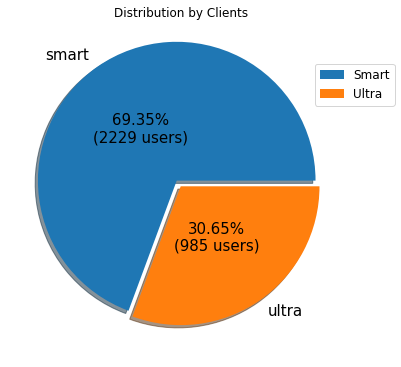

In [30]:
all_users = products_by_month_all['user_id'].count()


def func_pct(pct):
    value = float(pct/100.*all_users)
    return "{:.2f}%\n({:.0f} users)".format(pct, value)

explode = (0.05, 0)  

axes = products_by_month_all.groupby('tariff')['user_id'].count().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Distribution by Clients', pctdistance=0.45,
                                                                     figsize=(20,5), autopct=lambda pct: func_pct(pct))

plt.tight_layout(pad=0)

for ax in axes:
    ax.legend(['Smart', 'Ultra'], bbox_to_anchor=(0.87,0.87), prop={'size':12})
    ax.set_ylabel('')


Most users choose the cheapest option.

We begin our analysis by calculating dispersion, standard deviation, mean and median.

In [31]:
statistics = products_by_month_all.pivot_table(index=['tariff'], values=['calls_dur', 'mb_used', 'messages_num'], 
                    aggfunc={'calls_dur': [np.mean, np.median, np.var, np.std], 
                             'mb_used': [np.mean, np.median, np.var, np.std], 
                             'messages_num': [np.mean, np.median, np.var, np.std]})
statistics

calls_dur                          mb_used                    \
            mean median    std       var     mean   median      std   
tariff                                                                
smart     417.93 422.00 190.31  36219.32 16208.39 16506.84  5870.48   
ultra     526.62 518.00 317.61 100873.63 19468.81 19308.01 10087.17   

                    messages_num                       
                var         mean median   std     var  
tariff                                                 
smart   34462496.46        33.38  28.00 28.23  796.81  
ultra  101751013.78        49.36  38.00 47.80 2285.27

From the table above we can see that both the tariffs have mean and median of almost the same value for each parameter. it means that the distribution is symmetric. Tariff Ultra has a wider dispersion for each parameter. It can be explained by the fact that Ultra subscibers have more minutes, messages and GB included in their package.

It's time to visualize the data. The best way to do it is to build boxplots for each tariff and for each parameter. 

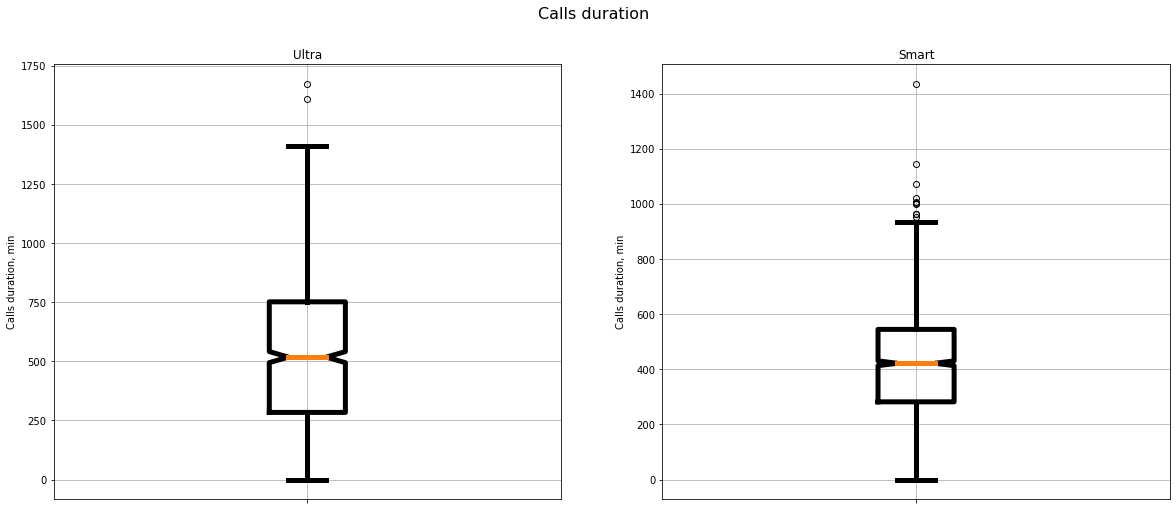

In [32]:
fig, (ultrax, smartx) = plt.subplots(1,2, figsize=(20,8))
ultra_min.boxplot(column = 'calls_dur', ax=ultrax, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
smart_min.boxplot(column='calls_dur', ax=smartx, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
ultrax.set_title('Ultra')
smartx.set_title('Smart')
ultrax.set_ylabel('Calls duration, min')
smartx.set_ylabel('Calls duration, min')
#ultrax.set_xlabel('Длительность, звонков')
#smartx.set_xlabel('Длительность, звонков')
fig.suptitle('Calls duration', fontsize=16)
ultrax.set_xticklabels([])
smartx.set_xticklabels([])
plt.show()

Smart plan boxplot has more outliers. Its subscribers use more minutes and GBs than included in the package. Let's remove outliers and build histograms for each plan. Outliers are unusual values in the dataset, outliers affect on variance, and standard deviation of a data distribution. In a data distribution, with extreme outliers, the distribution is skewed in the direction of the outliers which makes it difficult to analyze the data.

In [33]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out

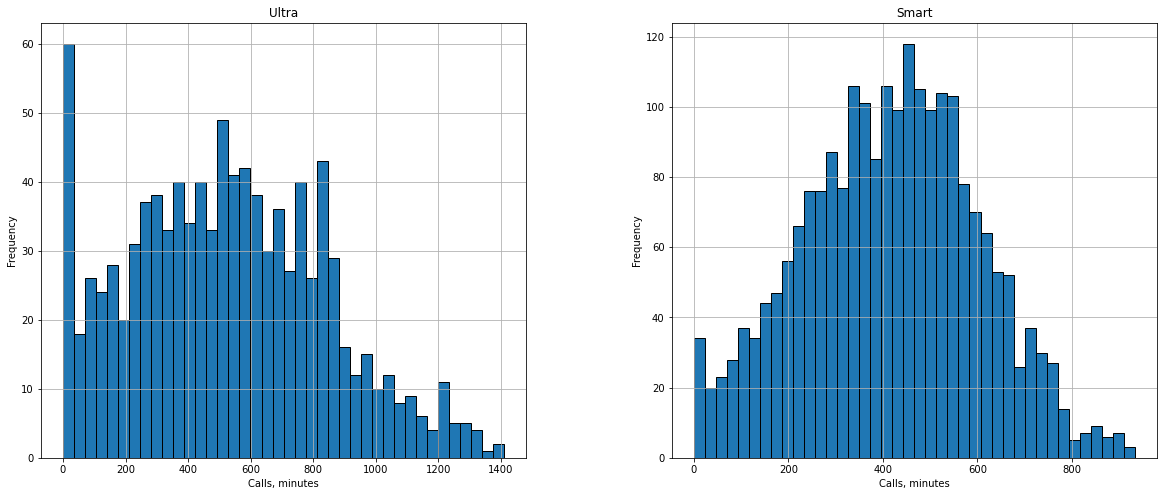

In [34]:
ultra_calls_no_outliers=remove_outlier(ultra_min, 'calls_dur')
smart_calls_no_outliers=remove_outlier(smart_min, 'calls_dur')
fig, (centerx, allx) = plt.subplots(1,2, figsize=(20,8))
ultra_calls_no_outliers.hist('calls_dur', ax=centerx, bins=40, ec='black') 
smart_calls_no_outliers.hist('calls_dur', bins=40, ax=allx, ec='black')
centerx.set_title('Ultra')
centerx.set_xlabel('Calls, minutes')
centerx.set_ylabel('Frequency')
allx.set_title('Smart')
allx.set_xlabel('Calls, minutes')
allx.set_ylabel('Frequency')
plt.show()

Ultra package includes 3000 minutes talk, Smart - 500 minutes talk. We can see that ultra subscribers do not exceed the plan limits whereas Smart subscibers go over the plan's quota. 

Now let's study the internet usage:

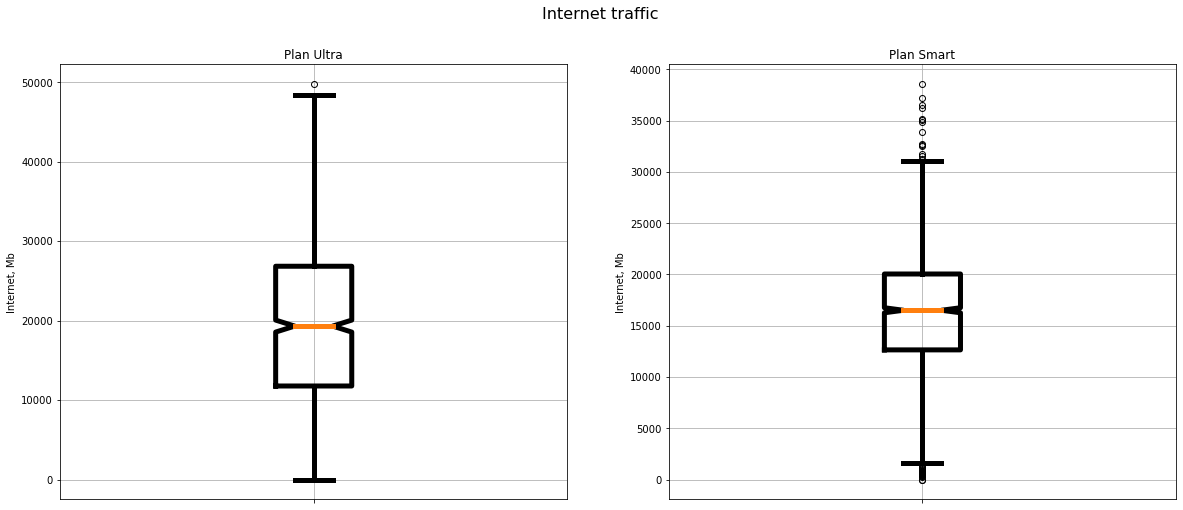

In [35]:
fig, (ultrax, smartx) = plt.subplots(1,2, figsize=(20,8))
ultra_min.boxplot(column = 'mb_used', ax=ultrax, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
smart_min.boxplot(column='mb_used', ax=smartx, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
ultrax.set_title('Plan Ultra')
smartx.set_title('Plan Smart')
ultrax.set_ylabel('Internet, Mb')
smartx.set_ylabel('Internet, Mb')
fig.suptitle('Internet traffic', fontsize=16)
ultrax.set_xticklabels([])
smartx.set_xticklabels([])
plt.show()

Again, we can see that Smart plan subscribers exceed their limit.

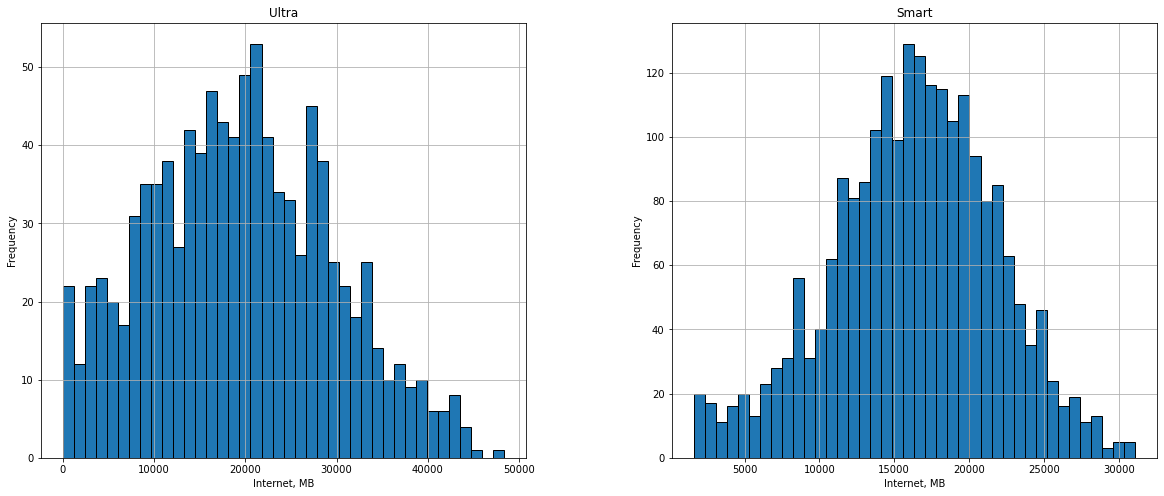

In [36]:
ultra_mb_no_outliers=remove_outlier(ultra_min, 'mb_used')
smart_mb_no_outliers=remove_outlier(smart_min, 'mb_used')
fig, (centerx, allx) = plt.subplots(1,2, figsize=(20,8))
ultra_mb_no_outliers.hist('mb_used', ax=centerx, bins=40, ec='black') 
smart_mb_no_outliers.hist('mb_used', bins=40, ax=allx, ec='black')
centerx.set_title('Ultra')
centerx.set_xlabel('Internet, MB')
centerx.set_ylabel('Frequency')
allx.set_title('Smart')
allx.set_xlabel('Internet, MB')
allx.set_ylabel('Frequency')
plt.show()

Ultra subscribers have 30 GB included in the package, Smart subscibers have 15 Gb in their package. All the subscribers are active internet users and many of them exceed the plan limits.

Now we have to study the text messages data:

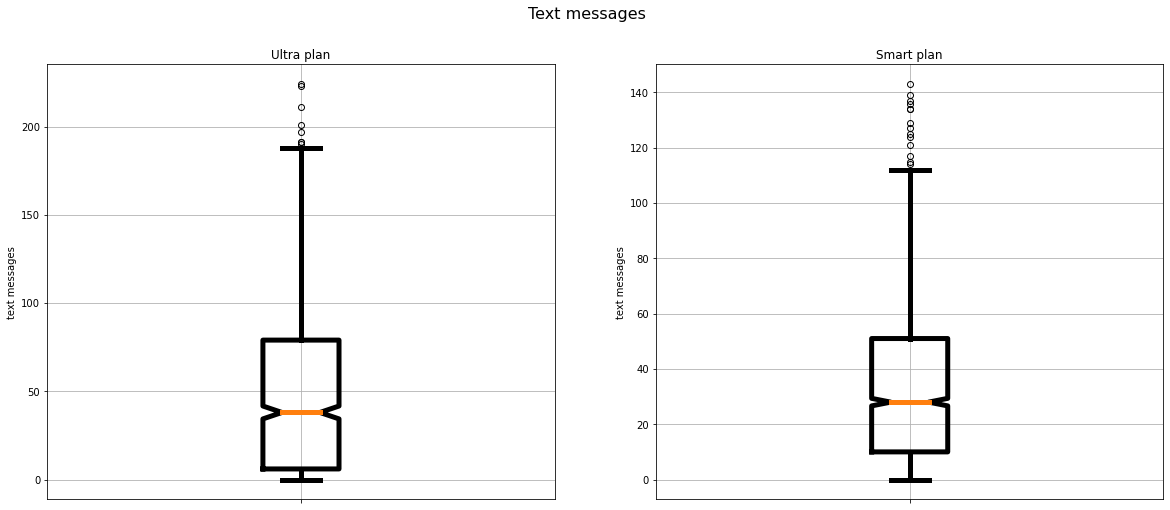

In [37]:
fig, (ultrax, smartx) = plt.subplots(1,2, figsize=(20,8))
ultra_min.boxplot(column = 'messages_num', ax=ultrax, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
smart_min.boxplot(column='messages_num', ax=smartx, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
ultrax.set_title('Ultra plan')
smartx.set_title('Smart plan')
ultrax.set_ylabel('text messages')
smartx.set_ylabel('text messages')
fig.suptitle('Text messages', fontsize=16)
ultrax.set_xticklabels([])
smartx.set_xticklabels([])
plt.show()

Let's remove the outliers using our function.

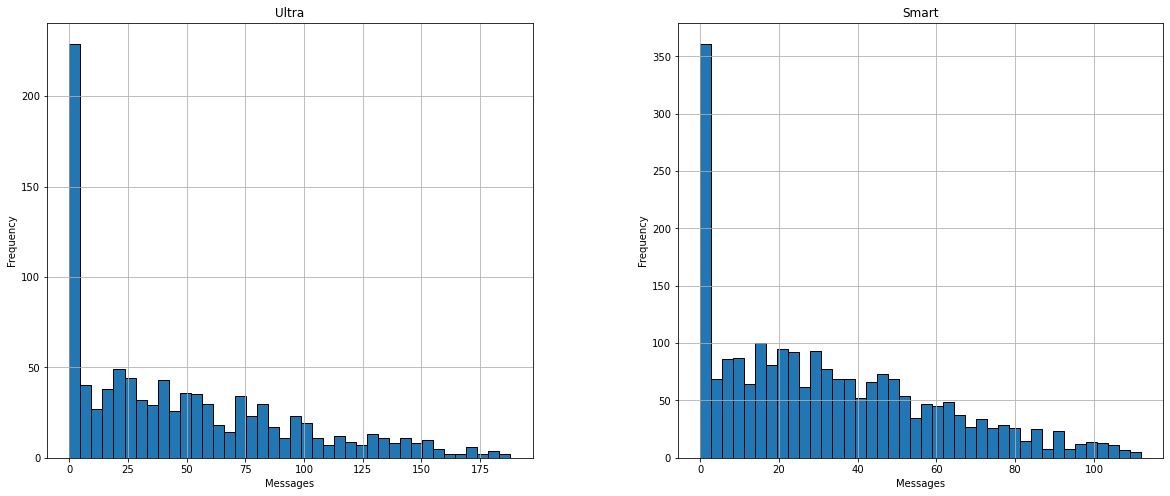

In [38]:
ultra_text_no_outliers=remove_outlier(ultra_min, 'messages_num')
smart_text_no_outliers=remove_outlier(smart_min, 'messages_num')
fig, (centerx, allx) = plt.subplots(1,2, figsize=(20,8))
ultra_text_no_outliers.hist('messages_num', ax=centerx, bins=40, ec='black') 
smart_text_no_outliers.hist('messages_num', bins=40, ax=allx, ec='black')
centerx.set_title('Ultra')
centerx.set_xlabel('Messages')
centerx.set_ylabel('Frequency')
allx.set_title('Smart')
allx.set_xlabel('Messages')
allx.set_ylabel('Frequency')
plt.show()

Ultra plan includes 1000 text messages per month, Smart plan includes 50 text messages. Again, Ultra subscribers do not exceed the limit, whereas some Smart subscribers go over the limit.

Revenue from each plan includes subscription fee and charges for extra calls, text messages and traffic used. It will be useful to group data by month for each plan and calculate median value for each revenue component. we can also visualize the results.

In [39]:
smart_month_median = smart_min.groupby('month').median().reset_index()
ultra_month_median = ultra_min.groupby('month').median().reset_index()
smart_month_median['month'] =smart_month_median['month'].astype(month_type) 
ultra_month_median['month'] =ultra_month_median['month'].astype(month_type) 
smart_month_median = smart_month_median.sort_values(by='month')
ultra_month_median = ultra_month_median.sort_values(by='month')
smart_month_median

,month,user_id,calls_num,calls_dur,mb_used,messages_num,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_calls,extra_sms,extra_internet,total_charge
4,January,1290.50,20.50,162.50,7096.19,15.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,0.00,550.00
3,February,1295.00,38.50,258.00,12553.71,20.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,0.00,550.00
7,March,1262.00,59.00,409.00,15670.25,23.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,200.00,973.00
0,April,1233.00,52.00,368.50,14087.65,28.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,0.00,653.50
8,May,1238.00,59.00,433.00,16323.94,30.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,200.00,1150.00
6,June,1220.00,59.00,400.00,16077.44,28.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,200.00,973.00
5,July,1221.00,58.00,414.00,15925.29,29.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,200.00,1219.00
1,August,1244.00,62.00,432.00,16833.49,27.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,400.00,1344.00
11,September,1249.50,61.00,435.00,16028.43,30.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,200.00,1150.00
10,October,1247.50,60.50,427.50,17225.33,30.00,50.00,15360.00,500.00,550.00,200.00,3.00,3.00,0.00,0.00,400.00,1277.00


We'll plot bar charts for each plan, for each service (calls, messages, internet). The dashed line marks the plan limit. 

Below we build a bar chart with median call duration by months. We choose median to illustrate call duration because median is resistant to outliers.

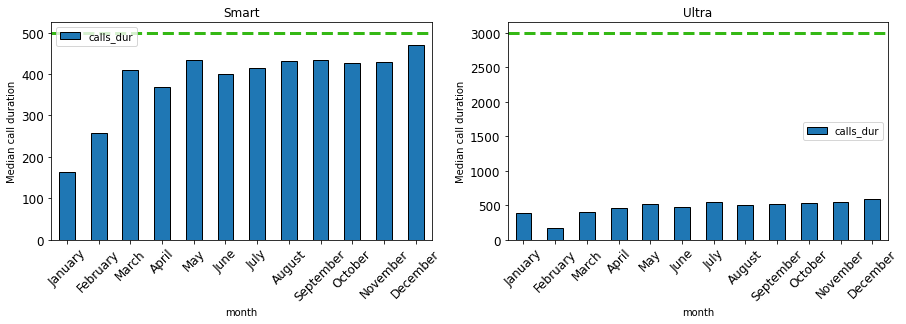

In [40]:
fig, (centerx, allx) = plt.subplots(1,2, figsize=(15,15))
smart_month_median.plot(x='month', y='calls_dur', ax=centerx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') 
ultra_month_median.plot(x='month', y='calls_dur', ax=allx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') 
centerx.axhline(y=tariffs[tariffs['tariff_name']=='smart']['minutes_included'].min(),linewidth=3, color='#35B815', linestyle='--')
allx.axhline(y=tariffs[tariffs['tariff_name']=='ultra']['minutes_included'].min(),linewidth=3, color='#35B815', linestyle='--')
centerx.set_title('Smart')
centerx.set_xlabel('month')
centerx.set_ylabel('Median call duration')
allx.set_title('Ultra')
allx.set_xlabel('month')
allx.set_ylabel('Median call duration')
plt.show()

As we can see from the chart above, median call duration is within limits for both the plans.

Internet used by months:

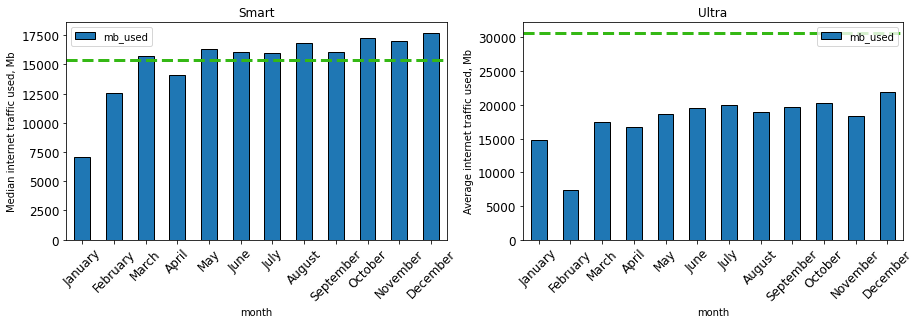

In [41]:
fig, (centerx, allx) = plt.subplots(1,2, figsize=(15,15))
smart_month_median.plot(x='month', y='mb_used', ax=centerx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') # строим гистограмму для цен в центре
ultra_month_median.plot(x='month', y='mb_used', ax=allx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') # и для цен в городе и области
centerx.axhline(y=tariffs[tariffs['tariff_name']=='smart']['mb_per_month_included'].min(),linewidth=3, color='#35B815', linestyle='--')
allx.axhline(y=tariffs[tariffs['tariff_name']=='ultra']['mb_per_month_included'].min(),linewidth=3, color='#35B815', linestyle='--')
centerx.set_title('Smart')
centerx.set_xlabel('month')
centerx.set_ylabel('Median internet traffic used, Mb')
allx.set_title('Ultra')
allx.set_xlabel('month')
allx.set_ylabel('Average internet traffic used, Mb')
plt.show()

Smart subscribers go over the limit with internet traffic whereas Ultra subscribers stay within the limits.

Text messages sent:

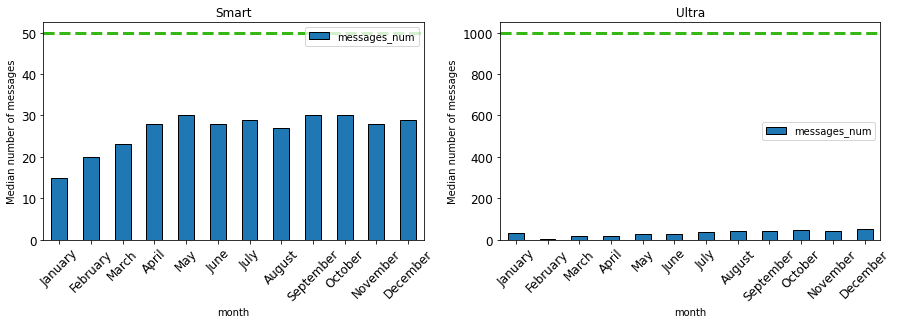

In [42]:
fig, (centerx, allx) = plt.subplots(1,2, figsize=(15,15))
smart_month_median.plot(x='month', y='messages_num', ax=centerx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') # строим гистограмму для цен в центре
ultra_month_median.plot(x='month', y='messages_num', ax=allx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') # и для цен в городе и области
centerx.axhline(y=tariffs[tariffs['tariff_name']=='smart']['messages_included'].min(),linewidth=3, color='#35B815', linestyle='--')
allx.axhline(y=tariffs[tariffs['tariff_name']=='ultra']['messages_included'].min(),linewidth=3, color='#35B815', linestyle='--')
centerx.set_title('Smart')
centerx.set_xlabel('month')
centerx.set_ylabel('Median number of messages')
allx.set_title('Ultra')
allx.set_xlabel('month')
allx.set_ylabel('Median number of messages')
plt.show()

Text messages are not in high demand.

We can also plot median monthly payment (subscription fee+extra charges) for each plan.

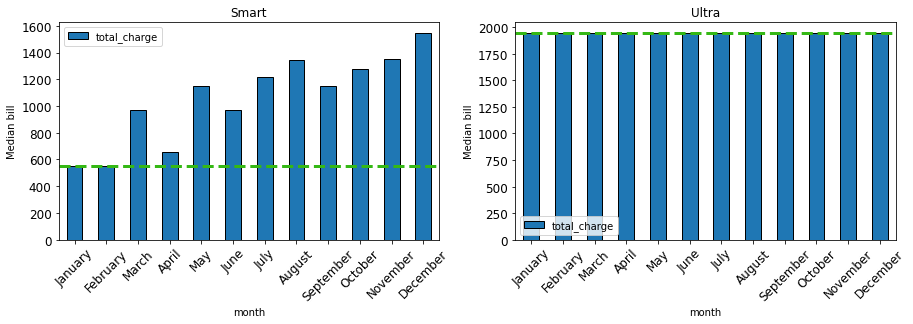

In [43]:
fig, (centerx, allx) = plt.subplots(1,2, figsize=(15,15))
smart_month_median.plot(x='month', y='total_charge', ax=centerx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') # строим гистограмму для цен в центре
ultra_month_median.plot(x='month', y='total_charge', ax=allx, kind='bar', fontsize=12, rot=45, figsize=(15,4), ec='black') # и для цен в городе и области
centerx.axhline(y=tariffs[tariffs['tariff_name']=='smart']['rub_monthly_fee'].min(),linewidth=3, color='#35B815', linestyle='--')
allx.axhline(y=tariffs[tariffs['tariff_name']=='ultra']['rub_monthly_fee'].min(),linewidth=3, color='#35B815', linestyle='--')
centerx.set_title('Smart')
centerx.set_xlabel('month')
centerx.set_ylabel('Median bill')
allx.set_title('Ultra')
allx.set_xlabel('month')
allx.set_ylabel('Median bill')
plt.show()

It was quite predictable, Ultra subscribers do not overpay that much but their subscruption fee is thrice higher than the Smart plan subscription fee. Smart plan subscribers overpay regurlarly and a lot. However, median total revenue from Smart subscibers is still lower than the median total revenue from Ultra subscribers. Then we plot total revenue for each tariff: 

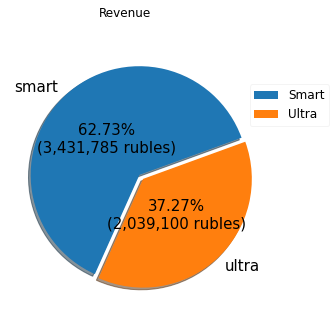

In [44]:
total_revenue = products_by_month_all['total_charge'].sum()


def func_pct(pct):
    value = float(pct/100.*total_revenue)
    return "{:.2f}%\n({:,.0f} rubles)".format(pct, value)

explode = (0.05, 0)  

axes = products_by_month_all.groupby('tariff')['total_charge'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                     use_index=False, shadow=True, explode=explode,
                                                                     title = 'Revenue', pctdistance=0.45,
                                                                     startangle=20, figsize=(20,5),
                                                                     autopct=lambda pct: func_pct(pct))

for ax in axes:
    ax.legend(['Smart', 'Ultra'], bbox_to_anchor=(0.87,0.87), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

Revenue from 'Smart' plan is greater than revenue from 'Ultra' plan because there are more subscribers on 'Smart' plan than on 'Ultra' plan and many of them overpay for extra traffic and phone calls. We also found out that text messages are not very popular and most extra revenue comes from internet traffic. We calculated median revenue by months for each plan and came to the conclusion that 'Ultra' subscribers usually do not overpay whereas 'Smart' subscribers overpay for internet traffic and phone calls. Mean and median values are mostly the same for each parameter.    

## Hypotheses testing.

As a part of our analysis we need to test 2 hypotheses: 
1. Average revenue from users of Ultra and Smart calling plans is different.
2. Average revenue from Moscow subscribers is different from average revenue from regional subscribers.
Let's test the first hypothesis. For this purpose we'll need scipy library and use stats.ttest_ind method. We also need to formulate 0 and 1 Hypothesis:
H0 - Average revenue per month for Ultra users = average revenue per month for Smart users.
H1 - Average revenue per month for Ultra users <> average revenue per month for Smart users.
We use a significance level (or alpha) of 0.05, which means that only in 5% of the case will we reject the null hypothesis when it is true. If p-value < , then reject null hypothesis. If p-value > , fail to reject null hypothesis. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

In [45]:
ultra_charge_no_outliers=remove_outlier(ultra_min, 'total_charge') # we remove outliers in 'total charge' column for each plan 
smart_charge_no_outliers=remove_outlier(smart_min, 'total_charge')
smart = smart_charge_no_outliers['total_charge']
ultra = ultra_charge_no_outliers['total_charge']

alpha = 0.05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 5.150031377415166e-121
We reject the null hypothesis


We reject the null hypothesis. Our analysis suggests that average revenue from users of Ultra and Smart calling plans differs.

It's time to test the second hypothesis that revenue from Moscow subscribers and subscribers from other regions is different. Let's formulate  H0 and H1 hypotheses:
H0  — average revenue from Moscow subscribers = average revenue from subscribers from other regions.
H1  — average revenue from Moscow subscribers <> average revenue from subscribers from other regions.

First, we need to find outliers:

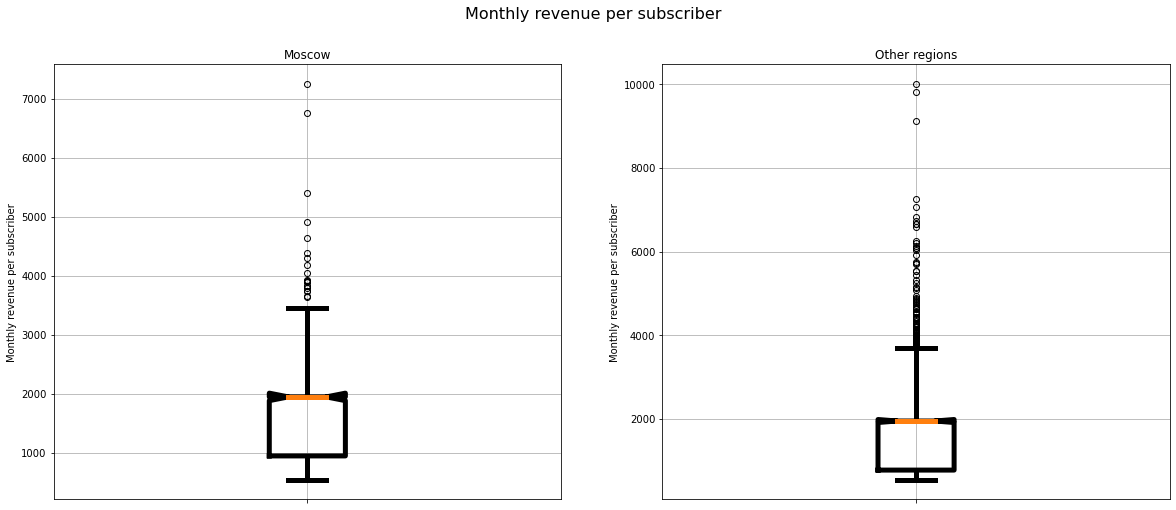

In [46]:
moscow_charge = products_by_month_all.query('city=="Москва"') # we need 2 tables: 1 for Moscow, 1 for other regions 
regions_charge = products_by_month_all.query('city!="Москва"')#

fig, (moscowx, regionx) = plt.subplots(1,2, figsize=(20,8))
moscow_charge.boxplot(column = 'total_charge', ax=moscowx, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
regions_charge.boxplot(column='total_charge', ax=regionx, boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True,)
moscowx.set_title('Moscow')
regionx.set_title('Other regions')
moscowx.set_ylabel('Monthly revenue per subscriber')
regionx.set_ylabel('Monthly revenue per subscriber')
fig.suptitle('Monthly revenue per subscriber', fontsize=16)
moscowx.set_xticklabels([])
regionx.set_xticklabels([])
plt.show()

In [47]:
moscow_revenue = remove_outlier(moscow_charge, 'total_charge') # we need 2 tables: 1 for Moscow, 1 for other regions
regions_revenue = remove_outlier(regions_charge, 'total_charge')
moscow_revenue = moscow_revenue['total_charge']
regions_revenue = regions_revenue['total_charge']
alpha = 0.05

results = st.ttest_ind(
    moscow_revenue, 
    regions_revenue, 
    equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 0.375527109224551
We fail to reject the null hypothesis


We fail to reject the null hypothesis, average revenue from Moscow subscribers is equal to the average revenur from subscribers from other regions.

## Conclusion:

We read and studied the data and prepared it for further analysis. We detected and removed the outliers from the data, and used the filtered data to compute the statistics. We determined that both the tariffs have mean and median of almost the same value for each parameter. it means that the distribution is symmetric. Tariff Ultra has a wider dispersion for each parameter. It can be explained by the fact that Ultra subscibers have more minutes, messages and GB included in their package.

We plotted the distribution and the frequency density of the plans per user and observed that, on the average, ultra users has more call duration per month, send more text messages, require more data volume than users in the smart plan. We also determined that users in the ultra plan brought in more revenue on the average than users in the smart plan. 

We formulated the null hypothesis by stating that there is no difference between the average revenue from users of ultra and smart calling plans. We used a significance level of 0.05 to calculate the p-value. From the hypothesis test, we determined that the group are different hence we reject the null hypothesis. The test suggested that average revenue from users of Ultra and Smart calling plans differs. We also tested the hypothesis by stating that there is no difference between the average revenue from users in Moscow, and users from other regions. Our hypothesis test shows that the average revenue from users in Moscow, and users from other regions are different.

We can conclude from this analysis that:

users on the ultra plan have more call duration per month, send more text messages, require more data volume, and bring in more average revenue than users on the smart plan.
Users on the smart plan on the average make more calls and use more data volume than included in their plan package. When users regularly overpay they try to find better options and the Telecom company may lose these subscribers. We were not provided with information about other plans the Telecom company offers to its Clients. The subscription fee for Ultra pan is thrice as high as the Smart plan subscription fee and it's doubtful that unsatisfied Smart plan subscribers will switch to Ultra plan.  
We also compared the average revenue from users in other regions and users from Moscow and found out that average revenue from Moscow subscribers is equal to the average revenur from subscribers from other regions.
Our recommendation is that the commercial department should adjust advertising budget and advertise more calls, messaging and internet data offers to the user in the ultra plan.
The ultra plan is more profitable than the smart plan even though the smart plan has more users overall than the ultra plan.
We could carry out further analysis to determine the average revenue by age group. That will also inform Megaline telecom on which age group and advertising medium to target for marketing purposes. For instance, if we analyze that people in the age group 1 - 25 brings in more revenue, we can also determine whether marketing on social media apps like TikTok or Instagram will bring in more users and revenue than TV or billboard advertisement. It should be noted that we can consider these 2 plans inisolation. We lack data on other plans offered by Megaline and infomation about plans offered by the competitors.  